In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/home/linh/Downloads/Covid/Cough/public_dataset_wav'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import IPython.display as display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
from tqdm import tqdm
import sklearn
import seaborn as sns
import plotly.express as px


import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [3]:
path = '/home/linh/Downloads/Covid/Cough/public_dataset_wav/'
#os.listdir(path)

In [4]:
def read_ogg_file(path, file):
    """ Read audio files and returning the numpay array and the samplerate"""
    
    data, samplerate = sf.read(path+file)
    return data, samplerate


def plot_audio_file(data, samplerate):
    """ Plot the audio data"""
    
    sr = samplerate
    fig = plt.figure(figsize=(8, 4))
    x = range(len(data))
    y = data
    plt.plot(x, y)
    plt.plot(x, y, color='red')
    plt.legend(loc='upper center')
    plt.grid()
    

In [5]:
#Plot spectrogram with mel scaling
def plot_spectrogram(data, samplerate):
    sr = samplerate
    spectrogram = librosa.feature.melspectrogram(data, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')

In [6]:
#train_labels = pd.read_csv(path+'train_soundscape_labels.csv')
train_meta = pd.read_csv(path+'metadata_compiled.csv')
#test_data = pd.read_csv(path+'test.csv')
#samp_subm = pd.read_csv(path+'sample_submission.csv')

In [7]:
#print('Number train label samples:', len(train_labels))
print('Number train meta samples:', len(train_meta))
#print('Number train short folder:', len(os.listdir(path+'train_short_audio')))
#print('Number train audios:', len(os.listdir(path+'train_soundscapes')))
#print('Number test samples:', len(test_data))

Number train meta samples: 20072


In [8]:
#os.listdir(path+'train_short_audio/caltow')[:2]

In [9]:
#train_labels.head()

In [10]:
train_meta.head()

uuid                          datetime  \
0  00039425-7f3a-42aa-ac13-834aaa2b6b92  2020-04-13T21:30:59.801831+00:00   
1  0009eb28-d8be-4dc1-92bb-907e53bc5c7a  2020-04-12T04:02:18.159383+00:00   
2  0012c608-33d0-4ef7-bde3-75a0b1a0024e  2020-04-15T01:03:59.029326+00:00   
3  001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f  2020-04-13T22:23:06.997578+00:00   
4  001c85a8-cc4d-4921-9297-848be52d4715  2020-04-17T15:24:35.822355+00:00   

   cough_detected  latitude  longitude   age gender respiratory_condition  \
0          0.9609      31.3       34.8  15.0   male                 False   
1          0.9301      40.0      -75.1  34.0   male                  True   
2          0.0482     -16.5      -71.5   NaN    NaN                   NaN   
3          0.9968       NaN        NaN  21.0   male                 False   
4          0.0735      40.6       -3.6   NaN    NaN                   NaN   

  fever_muscle_pain   status  ... quality_3 dyspnea_3 wheezing_3 stridor_3  \
0             False  healthy  ...       NaN       NaN        NaN       NaN   
1             False  healthy  ...       NaN       NaN        NaN       NaN   
2               NaN      NaN  ...       NaN       NaN        NaN       NaN   
3             False  healthy  ...       NaN       NaN        NaN       NaN   
4               NaN      NaN  ...       NaN       NaN        NaN       NaN   

  choking_3 congestion_3 nothing_3 cough_type_3 diagnosis_3 severity_3  
0       NaN          NaN       NaN          NaN         NaN        NaN  
1       NaN          NaN       NaN          NaN         NaN        NaN  
2       NaN          NaN       NaN          NaN         NaN        NaN  
3       NaN          NaN       NaN          NaN         NaN        NaN  
4       NaN          NaN       NaN          NaN         NaN        NaN  

[5 rows x 40 columns]

In [11]:
# DATA SIZE

print(f"Training Dataset Shape: {(train_meta.shape)}")
#print(f"Training Dataset Labels Shape: {(train_labels.shape)}")

Training Dataset Shape: (20072, 40)


In [12]:
# unique values in each column

print("Data: train")
for col in train_meta.columns:
    print(col + ":" + (str(len(train_meta[col].unique()))))

#print("\nData: train_labels")
#for col in train_labels.columns:
#    print(col + ":" + (str(len(train_labels[col].unique()))))

Data: train
uuid:20072
datetime:20072
cough_detected:6517
latitude:769
longitude:1306
age:93
gender:4
respiratory_condition:3
fever_muscle_pain:3
status:4
quality_1:5
cough_type_1:4
dyspnea_1:3
wheezing_1:3
stridor_1:2
choking_1:3
congestion_1:3
nothing_1:3
diagnosis_1:6
severity_1:5
quality_2:5
cough_type_2:4
dyspnea_2:3
wheezing_2:3
stridor_2:3
choking_2:3
congestion_2:3
nothing_2:3
diagnosis_2:6
severity_2:5
quality_3:5
dyspnea_3:3
wheezing_3:3
stridor_3:3
choking_3:2
congestion_3:3
nothing_3:3
cough_type_3:4
diagnosis_3:6
severity_3:5


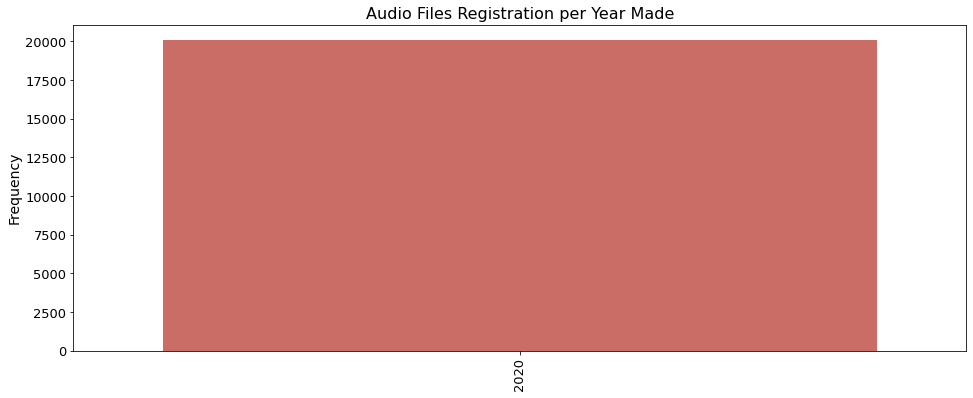

In [13]:
# Time of the various recording
train_meta['year'] = train_meta['datetime'].apply(lambda x: x.split("-")[0])
train_meta['month'] = train_meta['datetime'].apply(lambda x: x.split("-")[1])
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['year'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

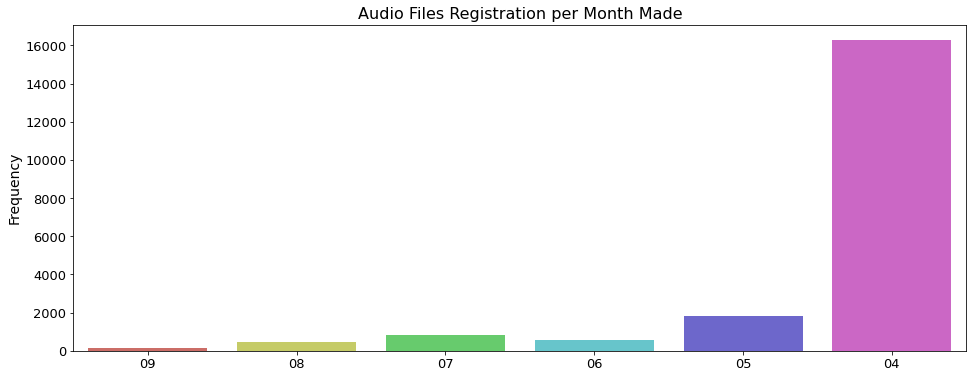

In [14]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['month'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Month Made", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

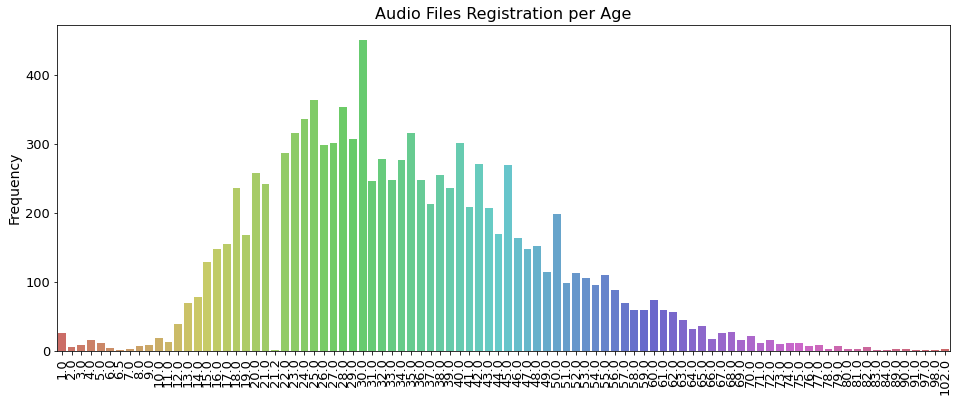

In [15]:
# Time of the various recording
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['age'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Age", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

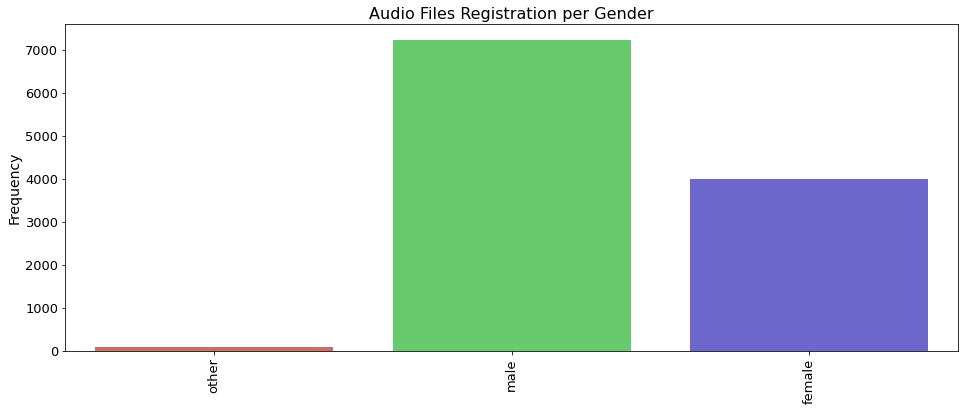

In [16]:
# Time of the various recording
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['gender'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Gender", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

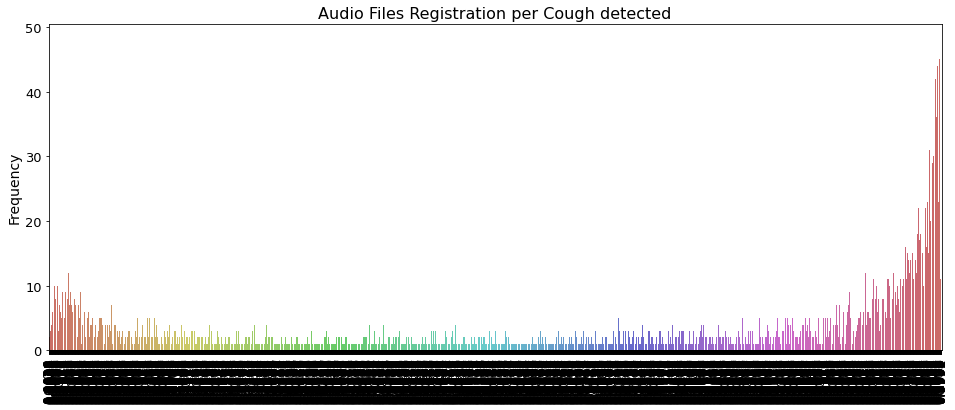

In [17]:
# Time of the various recording
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['cough_detected'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Cough detected", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

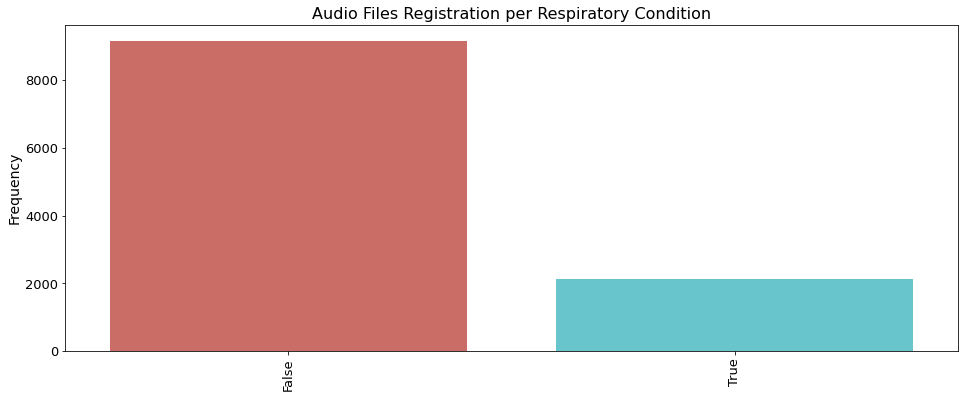

In [18]:
# Time of the various recording
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['respiratory_condition'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Respiratory Condition", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

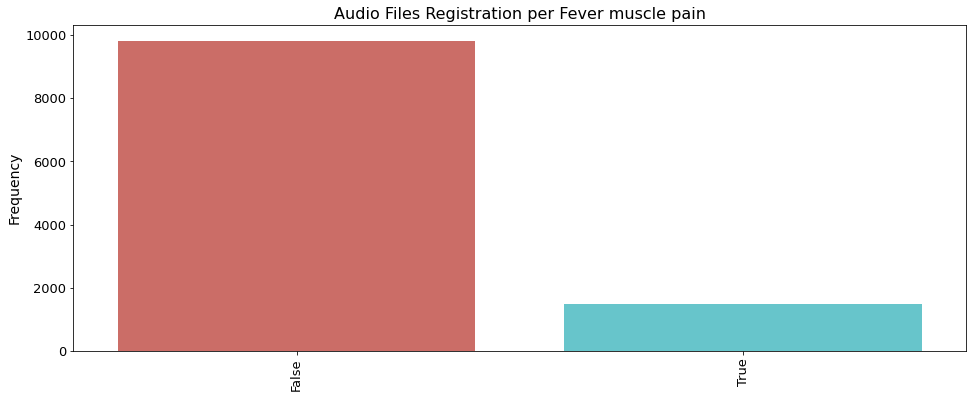

In [19]:
# Time of the various recording
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_meta['fever_muscle_pain'].sort_values(ascending=False), palette="hls")

plt.title("Audio Files Registration per Fever muscle pain", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

In [20]:
row = 0
train_meta.iloc[row]

uuid                     00039425-7f3a-42aa-ac13-834aaa2b6b92
datetime                     2020-04-13T21:30:59.801831+00:00
cough_detected                                         0.9609
latitude                                                 31.3
longitude                                                34.8
age                                                      15.0
gender                                                   male
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                                healthy
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congesti

In [21]:
label = train_meta.loc[row, 'uuid']
#filename = train_meta.loc[row, 'filename']

# Check if the file is in the folder
#filename in os.listdir(path + '+label)

In [22]:
filename = '/home/linh/Downloads/Covid/Cough/public_dataset_wav/b782e40c-5b34-425b-8753-dff29df5486b.wav'

Sample Rate:  22050


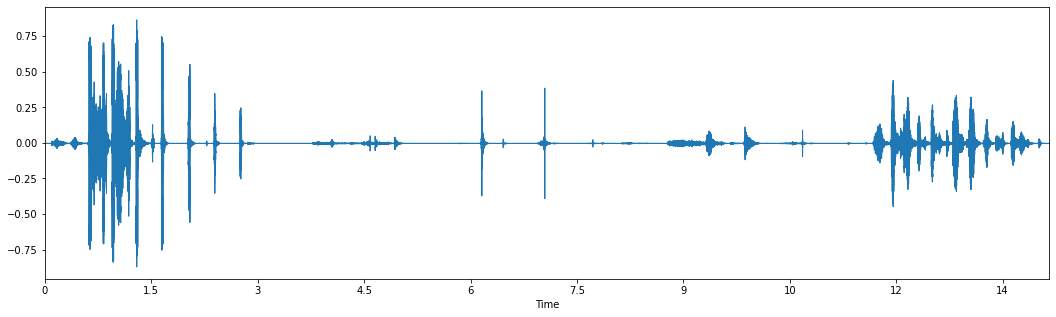

In [23]:
plt.figure(figsize=(18, 5))
#default sr=22050
# input is converted to mono by default
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
print("Sample Rate: ", sample_rate)
ipd.Audio(filename)


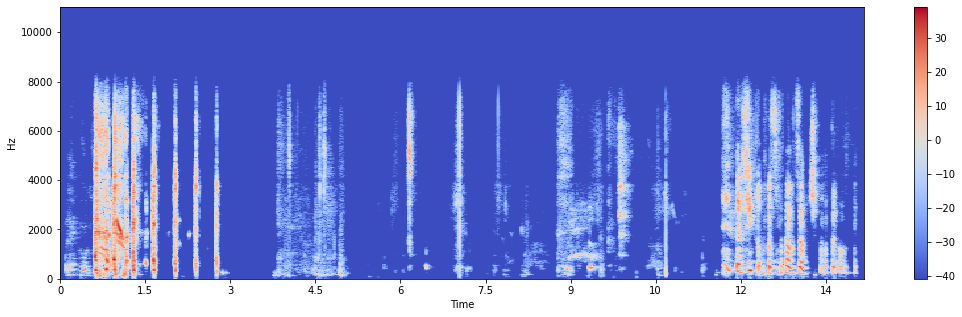

In [24]:
#spectrogram

plt.figure(figsize=(18, 5))
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

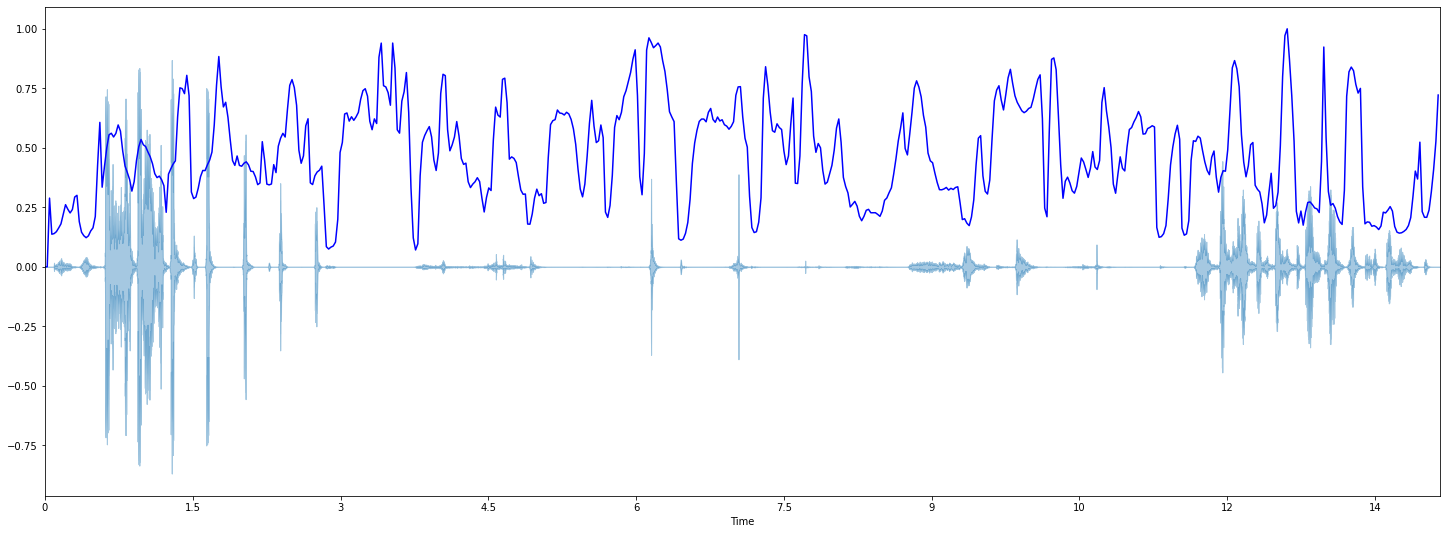

In [25]:
#spectral centroid

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
plt.figure(figsize=(25, 9))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along with the waveform
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

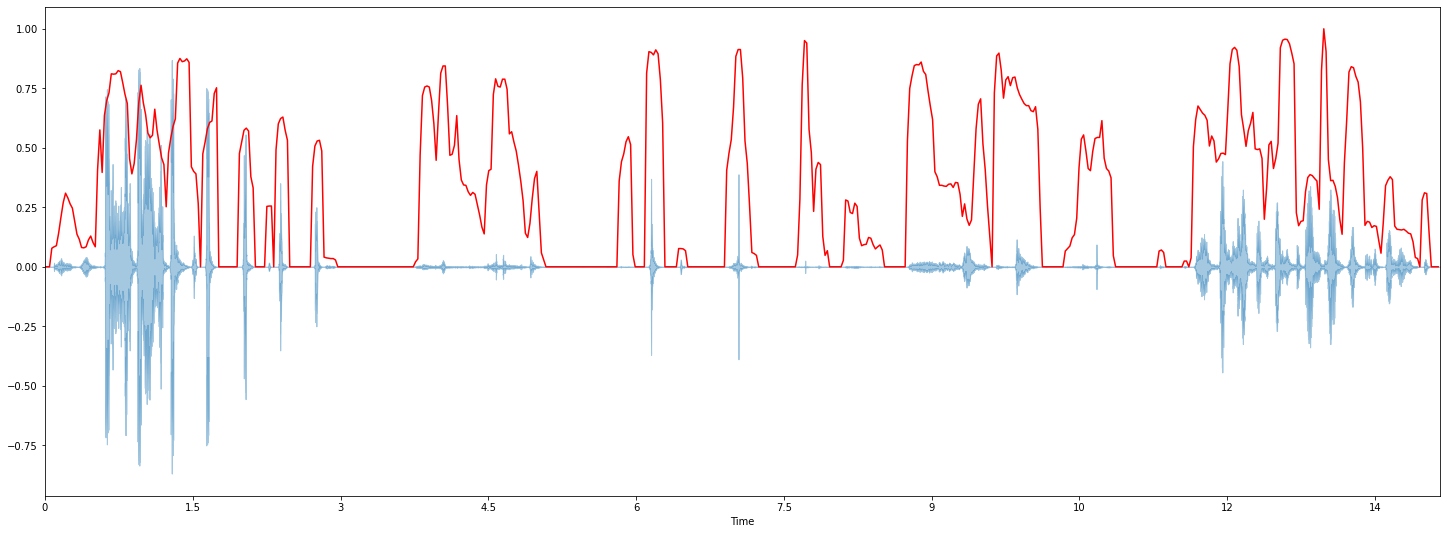

In [26]:
#spectral roll off

plt.figure(figsize=(25, 9))
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)[0]
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

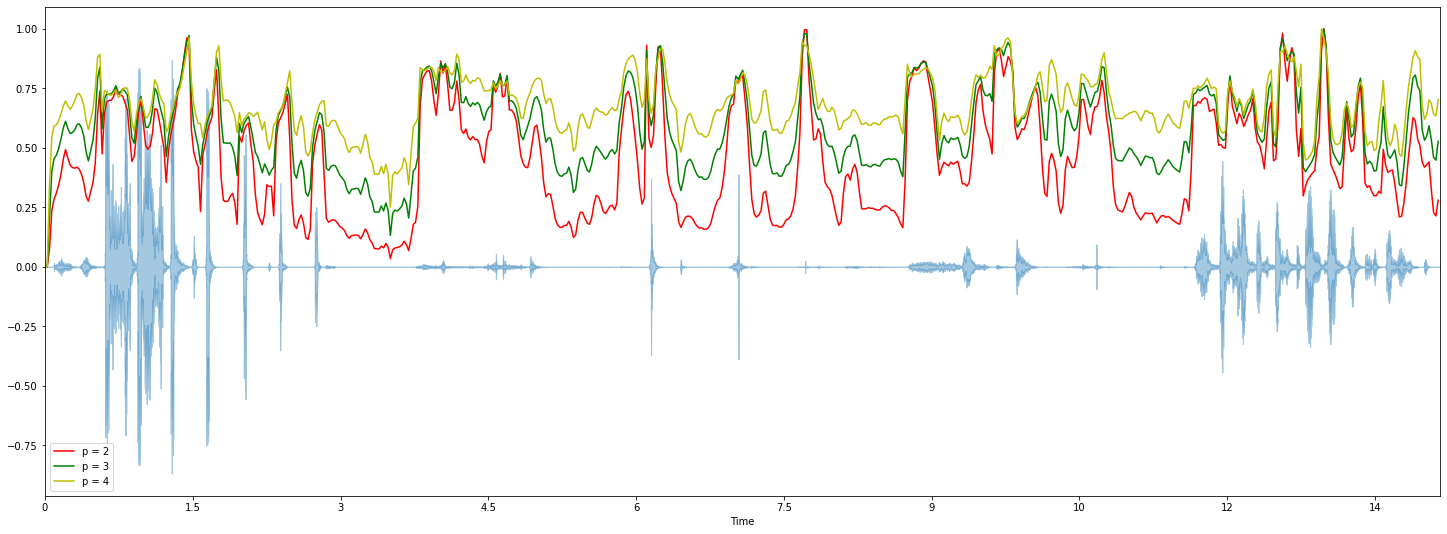

In [27]:
#spectral bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(25, 9))
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))  # p: order of spectral bandwidth

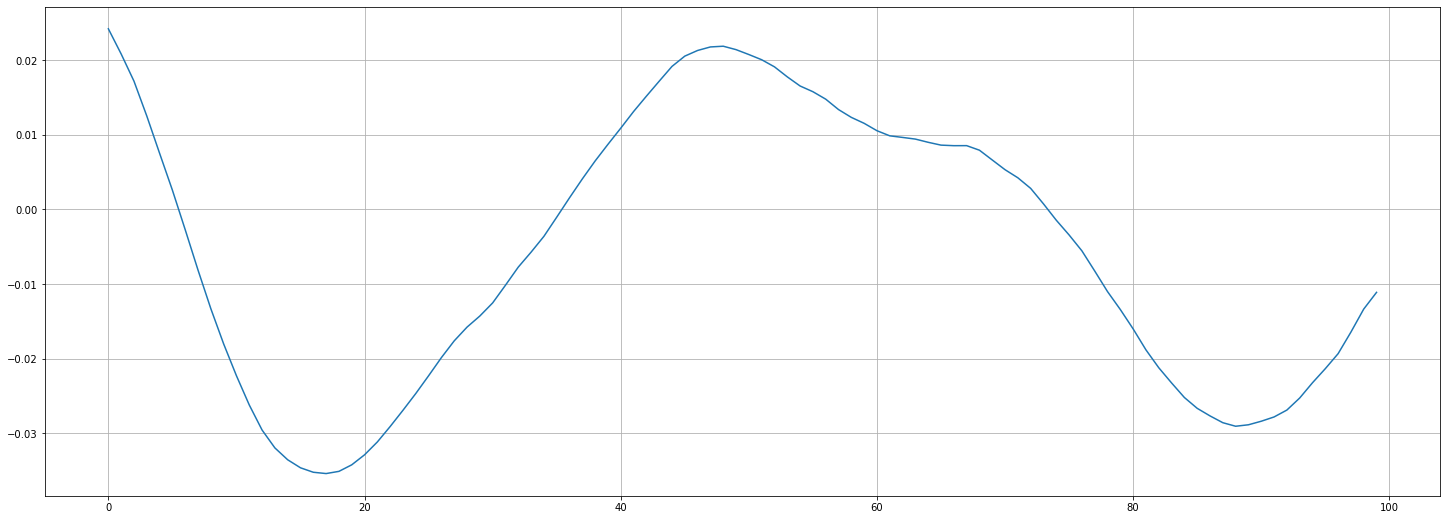

In [28]:
# ZCR

plt.figure(figsize=(25, 9))
# librosa.display.waveplot(data, sr=sample_rate)
# Zooming in
n0 = 9000
n1 = 9100

plt.plot(data[n0:n1])
plt.grid()

In [29]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings)) 

3


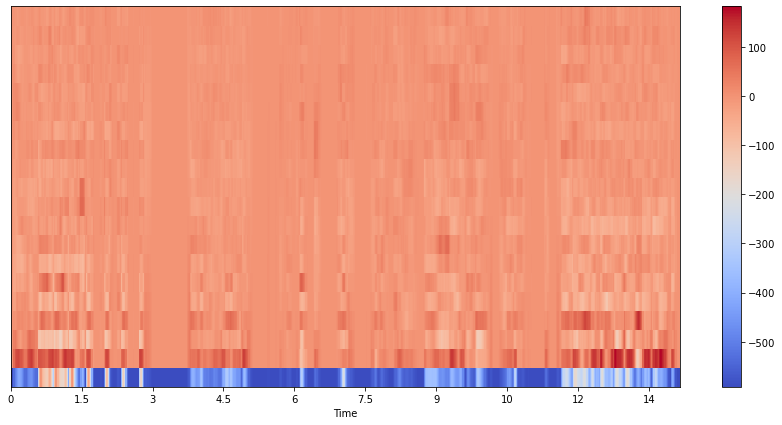

In [30]:
# Mel-Frequency Cepstral Coefficients (MFCCs)

mfccs = librosa.feature.mfcc(data, sr=sample_rate)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()

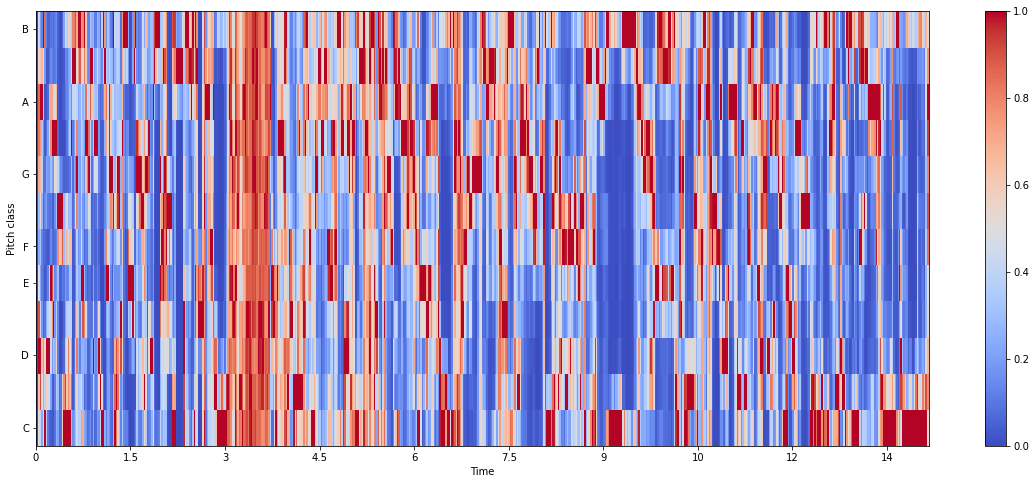

In [31]:
# Chrome features

hop_length=512
chromagram = librosa.feature.chroma_stft(data, sr=sample_rate, hop_length=hop_length)
plt.figure(figsize=(20, 8))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

In [32]:
print("There are total {} species".format(train_meta['uuid'].nunique()))

There are total 20072 species


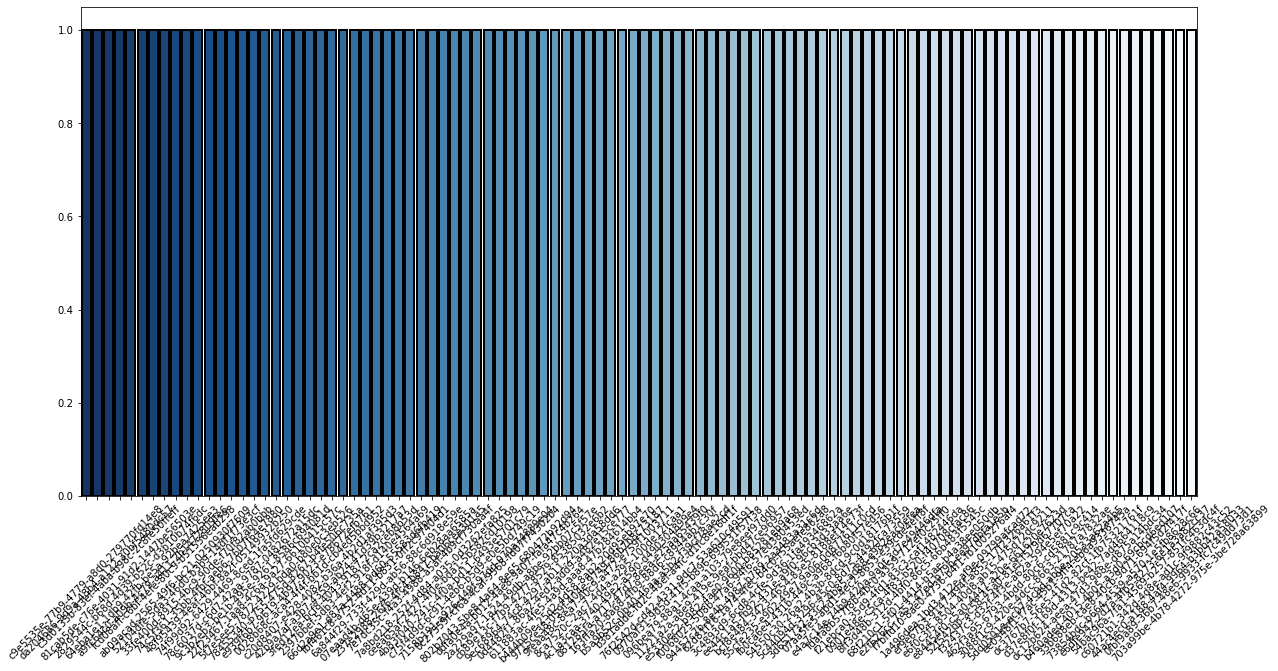

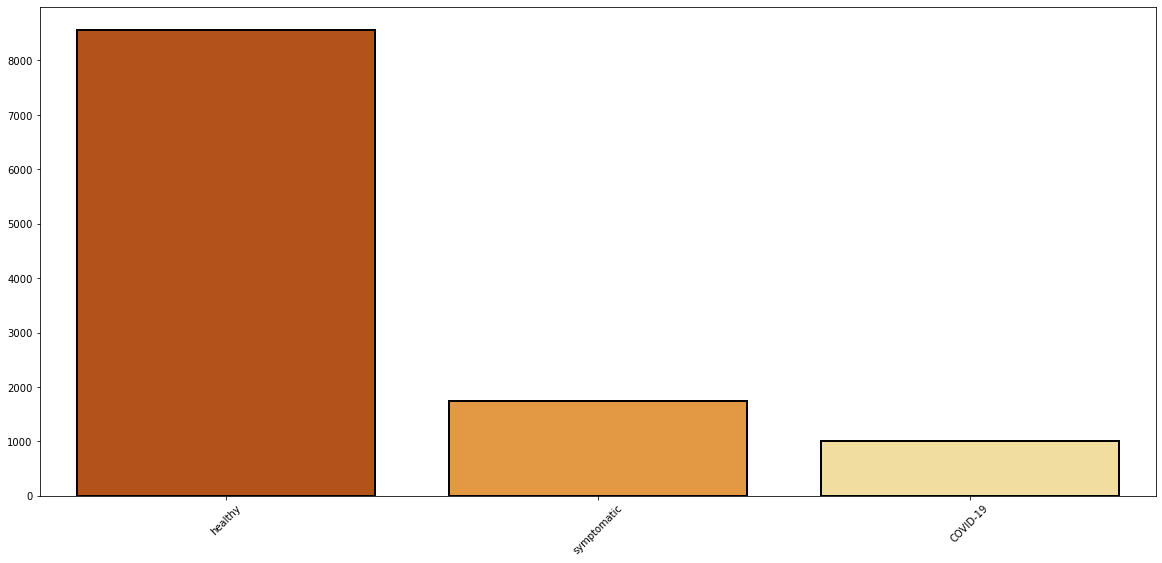

In [33]:
# Getting author with maximum entries
def plotbar(series, pal):
    plt.figure(figsize=(20, 9))
    chart = sns.barplot(x=series.index, y=series.values, edgecolor=(0,0,0), linewidth=2, palette=(pal))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
filename = train_meta['uuid'].value_counts()[:100]
plotbar(filename, "Blues_r")
status = train_meta['status'].value_counts()[:10]
plotbar(status, "YlOrBr_r") # series, palette

EDA

Sample Rate:  22050


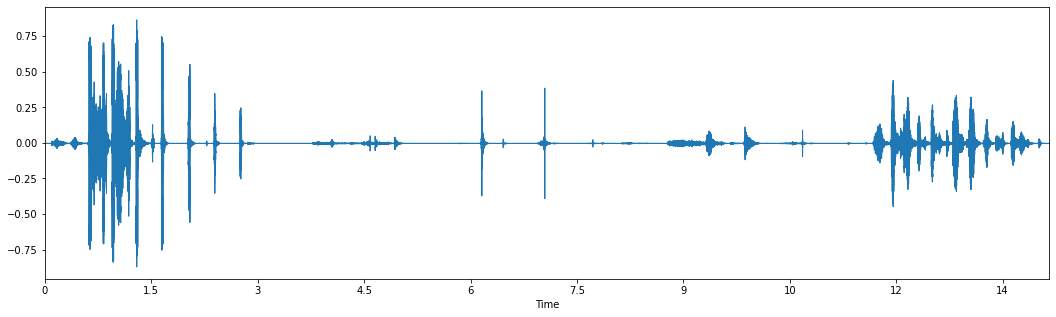

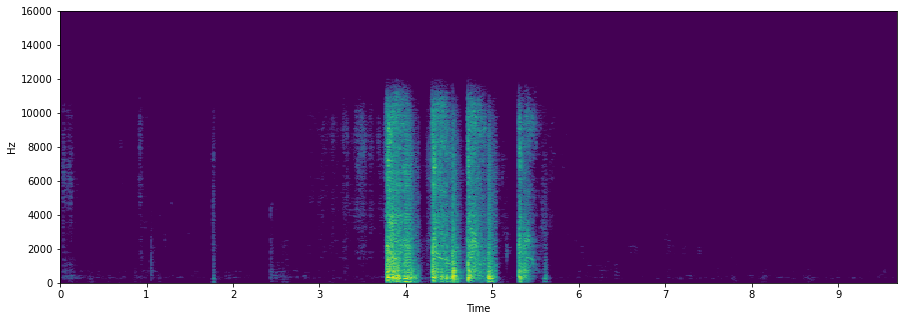

In [34]:
filename = '/home/linh/Downloads/Covid/Cough/public_dataset_wav/198fc8a1-f269-410c-a791-c32aaf60bb9b.wav'
plt.figure(figsize=(18, 5))

# by default librosa.load returns a sample rate of 22050
# librosa converts input to mono, hence always 
sig, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
print("Sample Rate: ", sample_rate)
ipd.Audio(filename)
# First, compute the spectrogram using the "short-time Fourier transform" (stft)
spec = librosa.stft(sig)

# Scale the amplitudes according to the decibel scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(spec_db, 
                         sr=32000, 
                         x_axis='time', 
                         y_axis='hz', 
                         cmap=plt.get_cmap('viridis'))

> In the past that convolutional neural networks (CNN) perform particularly well for sound classification. But CNN need 2D inputs. Luckily, we can transform an audio signal into a 2D representation: a so-called spectrogram.**

In [35]:
train_meta['status'].unique()

array(['healthy', nan, 'COVID-19', 'symptomatic'], dtype=object)

In [36]:
train_meta.groupby(by=['uuid']).count()['status'][:10]

uuid
00039425-7f3a-42aa-ac13-834aaa2b6b92    1
0009eb28-d8be-4dc1-92bb-907e53bc5c7a    1
0012c608-33d0-4ef7-bde3-75a0b1a0024e    0
001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f    1
001c85a8-cc4d-4921-9297-848be52d4715    0
001d8e33-a4af-4edb-98ba-b03f891d9a6c    1
00273cdf-ed90-4105-84ec-0c88d52f1dc0    0
0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952    1
00291cce-36a0-4a29-9e2d-c1d96ca17242    1
0029d048-898a-4c70-89c7-0815cdcf7391    1
Name: status, dtype: int64

In [37]:
# Credit here https://www.kaggle.com/rudramanidubey/eda-cnn-and-transfer-learning